# K-Means Clustering

## Statistical Learning

- The methods in general fall in these 4 categories

|                | Supervised     |         Unsupervised     |
 |----------------|:--------------:|:------------------------:|
 | **Discrete**   | Classification | Clustering               |   
 | **Continuous** | Regression     | Dimensionality Reduction |

Clustering the process of collecting a set of objects into groups or clusters of similar items
- Discover different species of birds based on their photographs
- Segment an image based on the pixel colors
- Organize news articles that cover the same story

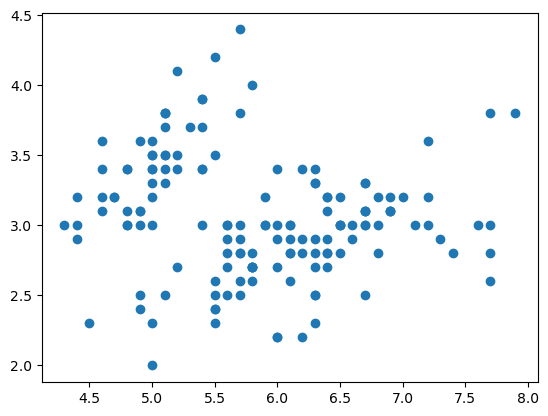

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,:2] 
# only the first 2 features

plt.scatter(X[:,0],X[:,1]);

## Types of Algorithms
- Flat
    - Start with a random partitioning
    - Iterate to improve the grouping
- Hierarchical
    - Greedy grouping of closest: bottom up
    - Greedy splitting of farthest: top down

## $k$-means clustering
- A simple (flat) algorithm

### Optimization
- Formally, it's an optimization over the possible groupings of objects
- For a set of $\{ x_l \}$ where $x_l\in \mathbb{R}^d$ for all $l$; $\displaystyle  \hat{{C}} = \textrm{arg}\min_{{C}} \sum_{i=1}^k \left[\ \sum_{x\in{}C_i}\ \lvert\!\lvert x-\mu_i\rvert\!\rvert^2 \right] $
    - where $\displaystyle  \mu_i = \frac{1}{\lvert{C_i}\rvert}\sum_{x\in{}C_i} x $

### Algorithm
- Iteratively improving the $\mu_i$ **prototypes** of $k$ clusters
    - Pick $k$ random objects as the initial $\mu_i$ prototypes
    - Find for each object the closest prototype and assign to that cluster
    - Calculate the averages for each cluster to get new $\mu_i$
    - Repeat until convergence
- Often very fast, but no proof

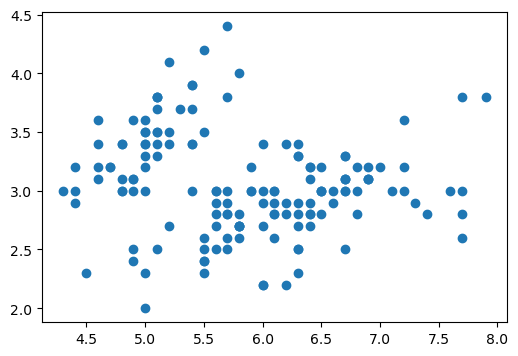

In [2]:
plt.figure(figsize=(6,6)); 
ax=plt.subplot(aspect='equal')
plt.scatter(X[:,0],X[:,1]);

Objective at minimum: 58.20409278906672


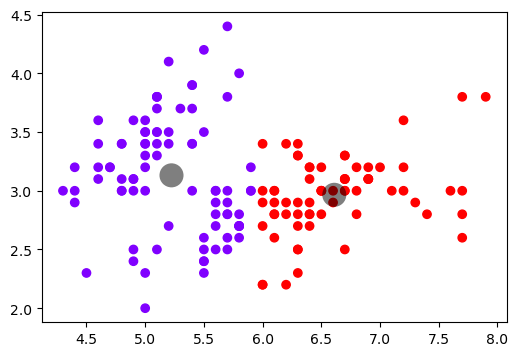

In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(init='random', n_clusters=2, n_init=100)
kmeans.fit(X)

print (f'Objective at minimum: {kmeans.inertia_}')

plt.figure(figsize=(6,6)); ax=plt.subplot(aspect='equal')
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_,cmap=plt.cm.rainbow);

C = kmeans.cluster_centers_
plt.scatter(C[:,0],C[:,1],c='k',marker='o',s=300,alpha=0.5,edgecolor='none');

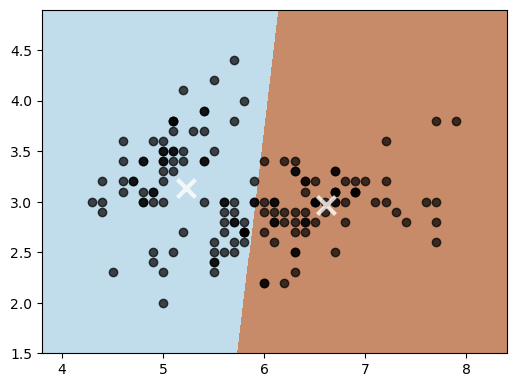

In [4]:
# Step size of the mesh. 
h = .005    # point in the mesh [x_min, m_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X[:, 0].min() -.5, X[:, 0].max() +.5
y_min, y_max = X[:, 1].min() -.5, X[:, 1].max() +.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
P = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
P = P.reshape(xx.shape)
plt.figure(figsize=(6,6)); 
plt.subplot(111,aspect='equal')
plt.clf()

plt.imshow(P, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='equal', origin='lower', alpha=0.7)

plt.scatter(X[:, 0], X[:, 1], c='k', alpha=0.7)

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10, alpha=0.8)

plt.xlim(x_min, x_max);
plt.ylim(y_min, y_max);

### Limitations
- Initialization matters
    - Rerun multiple times: **n_init** (default=10) 
    - Smart(er) starting points
- Assumes spherical clusters (use of distance function)
- Preprocessing becomes important even in simple cases

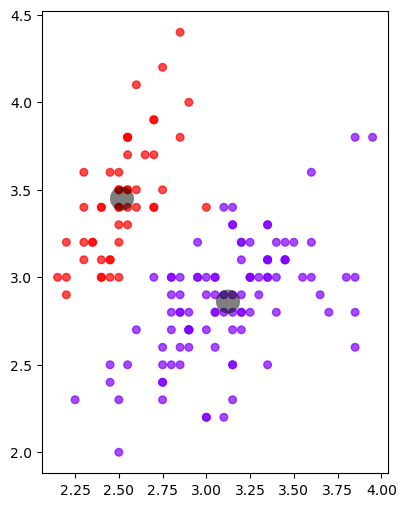

In [5]:
# transformations might help
Z = X.copy()
Z[:,0] *= 0.5

kmeans = KMeans(n_clusters=2,n_init=100,init='random') #'k-means++')
kmeans.fit(Z)
C, L = kmeans.cluster_centers_, kmeans.labels_

plt.figure(figsize=(6,6)); ax=plt.subplot(aspect='equal')
plt.scatter(Z[:,0],Z[:,1],c= L, marker='o',s= 30,alpha=0.7,cmap=plt.cm.rainbow);
plt.scatter(C[:,0],C[:,1],c='k',marker='o',s=300,alpha=0.5,edgecolor='none');

### Inertia
Inertia is the sum of squared distances from each data point to the centroid of the cluster it belongs to.
It measures how compact the clusters are.

$\text{Inertia} = \sum_{i=1}^{k} \sum_{x \in C_i} \| x - \mu_i \|^2$

Where:
    - $C_i =$ set of points assigned to cluster i
    - $\mu_i =$ centroid of cluster i
    - $\| x - \mu_i \|^2 =$ squared Euclidean distance

Interpretation:
    - Lower inertia: tighter, more coherent clusters
    - Higher inertia: cluster assignments are more spread out

Important: Inertia always decreases as k increases, so it is mainly used with the elbow method to select a good value for k.

In [6]:
kmeans.inertia_

30.063975000000006

### What $k$?
- How many clusters?
- Various diagnostics
    - Check the minimum value of the cost function
    - Characterize the clusters - Gaussian? spherical?

### Variangt: $k$-medians clustering
- Replace mean with median for cluster centers 
- Also, Euclidean ($L_2$) vs Taxicab ($L_1$) distance 